In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hr-analytics-job-change-of-data-scientists/sample_submission.csv
/kaggle/input/hr-analytics-job-change-of-data-scientists/aug_test.csv
/kaggle/input/hr-analytics-job-change-of-data-scientists/aug_train.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cbook, rc_params_from_file, rcParamsDefault

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn import metrics

#classifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from sklearn import svm

from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *

In [3]:
train = pd.read_csv(r"/kaggle/input/hr-analytics-job-change-of-data-scientists/aug_train.csv")
test = pd.read_csv(r"/kaggle/input/hr-analytics-job-change-of-data-scientists/aug_test.csv")

In [4]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
enrollee_id,19158.0,16875.358179,9616.292592,1.000,8554.25,16982.500,25169.75,33380.000
city_development_index,19158.0,0.828848,0.123362,0.448,0.74,0.903,0.92,0.949
training_hours,19158.0,65.366896,60.058462,1.000,23.00,47.000,88.00,336.000
target,19158.0,0.249348,0.432647,0.000,0.00,0.000,0.00,1.000


In [5]:
train.keys()

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

company_size와 company_type에서 null이 많으므로 두 변수는 제외하려고 함

In [7]:
train=pd.DataFrame(train, columns=['enrollee_id','city', 'city_development_index', 'gender',
                                     'relevent_experience', 'enrolled_university', 'education_level',
                                     'major_discipline', 'experience', 'last_new_job', 'training_hours', 'target'])

In [8]:
test=pd.DataFrame(test, columns=['enrollee_id','city', 'city_development_index', 'gender',
                                 'relevent_experience', 'enrolled_university', 'education_level',
                                 'major_discipline', 'experience', 'last_new_job', 'training_hours'])

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             2129 non-null   int64  
 1   city                    2129 non-null   object 
 2   city_development_index  2129 non-null   float64
 3   gender                  1621 non-null   object 
 4   relevent_experience     2129 non-null   object 
 5   enrolled_university     2098 non-null   object 
 6   education_level         2077 non-null   object 
 7   major_discipline        1817 non-null   object 
 8   experience              2124 non-null   object 
 9   last_new_job            2089 non-null   object 
 10  training_hours          2129 non-null   int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 183.1+ KB


null이 있는 행 삭제

In [10]:
train.isnull().sum()/len(train) # count Null

enrollee_id               0.000000
city                      0.000000
city_development_index    0.000000
gender                    0.235306
relevent_experience       0.000000
enrolled_university       0.020148
education_level           0.024011
major_discipline          0.146832
experience                0.003393
last_new_job              0.022080
training_hours            0.000000
target                    0.000000
dtype: float64

In [11]:
# drop missing data
train.dropna(inplace=True)
test.dropna(inplace=True)
# train_d1=train[['enrolled_university','education_level','experience','last_new_job']].dropna()
# train_d1.isnull().sum()
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12477 entries, 0 to 19155
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             12477 non-null  int64  
 1   city                    12477 non-null  object 
 2   city_development_index  12477 non-null  float64
 3   gender                  12477 non-null  object 
 4   relevent_experience     12477 non-null  object 
 5   enrolled_university     12477 non-null  object 
 6   education_level         12477 non-null  object 
 7   major_discipline        12477 non-null  object 
 8   experience              12477 non-null  object 
 9   last_new_job            12477 non-null  object 
 10  training_hours          12477 non-null  int64  
 11  target                  12477 non-null  float64
dtypes: float64(2), int64(2), object(8)
memory usage: 1.2+ MB


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1386 entries, 0 to 2128
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             1386 non-null   int64  
 1   city                    1386 non-null   object 
 2   city_development_index  1386 non-null   float64
 3   gender                  1386 non-null   object 
 4   relevent_experience     1386 non-null   object 
 5   enrolled_university     1386 non-null   object 
 6   education_level         1386 non-null   object 
 7   major_discipline        1386 non-null   object 
 8   experience              1386 non-null   object 
 9   last_new_job            1386 non-null   object 
 10  training_hours          1386 non-null   int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 129.9+ KB


In [13]:
test.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
last_new_job              0
training_hours            0
dtype: int64

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12477 entries, 0 to 19155
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             12477 non-null  int64  
 1   city                    12477 non-null  object 
 2   city_development_index  12477 non-null  float64
 3   gender                  12477 non-null  object 
 4   relevent_experience     12477 non-null  object 
 5   enrolled_university     12477 non-null  object 
 6   education_level         12477 non-null  object 
 7   major_discipline        12477 non-null  object 
 8   experience              12477 non-null  object 
 9   last_new_job            12477 non-null  object 
 10  training_hours          12477 non-null  int64  
 11  target                  12477 non-null  float64
dtypes: float64(2), int64(2), object(8)
memory usage: 1.2+ MB


In [15]:
train

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,>4,47,0.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,4,8,0.0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,>4,18,1.0
8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,1,46,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19150,32313,city_160,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,10,3,23,0.0
19152,29754,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,Humanities,7,1,25,0.0
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,4,52,1.0


In [16]:
train = train.drop_duplicates('enrollee_id', keep='last')

object로 들어온 데이터를 정수형으로 바꿔줌 

In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for x in train:
    if train[x].dtypes=='object':
        train[x] = le.fit_transform(train[x])
# we have transformed all the non numeric data columns into data columns
# this method applies 0,1.. classification to different value types.

In [18]:
train.corr()['target'].sort_values()

city_development_index   -0.320513
enrolled_university      -0.160759
education_level          -0.079941
training_hours           -0.022063
gender                   -0.011310
last_new_job             -0.005256
experience                0.002124
major_discipline          0.011371
city                      0.043776
enrollee_id               0.046728
relevent_experience       0.161558
target                    1.000000
Name: target, dtype: float64

In [19]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
enrollee_id,12477.0,17116.220726,9867.593797,2.000,8549.000,17343.00,26046.00,33380.000
city,12477.0,41.814459,34.875137,0.000,5.000,47.00,62.00,119.000
city_development_index,12477.0,0.840812,0.117038,0.448,0.767,0.91,0.92,0.949
gender,12477.0,0.919612,0.309149,0.000,1.000,1.00,1.00,2.000
relevent_experience,12477.0,0.199327,0.399510,0.000,0.000,0.00,0.00,1.000
enrolled_university,12477.0,1.643584,0.726012,0.000,2.000,2.00,2.00,2.000
education_level,12477.0,0.314098,0.517260,0.000,0.000,0.00,1.00,2.000
major_discipline,12477.0,4.656167,1.039958,0.000,5.000,5.00,5.00,5.000
experience,12477.0,12.978120,6.817392,0.000,7.000,15.00,19.00,21.000
last_new_job,12477.0,1.664182,1.825791,0.000,0.000,1.00,4.00,5.000


In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12477 entries, 0 to 19155
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             12477 non-null  int64  
 1   city                    12477 non-null  int64  
 2   city_development_index  12477 non-null  float64
 3   gender                  12477 non-null  int64  
 4   relevent_experience     12477 non-null  int64  
 5   enrolled_university     12477 non-null  int64  
 6   education_level         12477 non-null  int64  
 7   major_discipline        12477 non-null  int64  
 8   experience              12477 non-null  int64  
 9   last_new_job            12477 non-null  int64  
 10  training_hours          12477 non-null  int64  
 11  target                  12477 non-null  float64
dtypes: float64(2), int64(10)
memory usage: 1.2 MB


target의 분포 확인

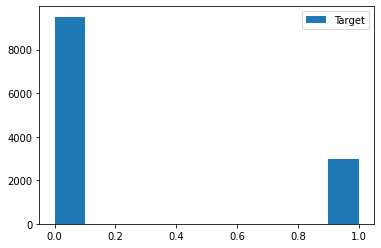

In [21]:
plt.hist(train['target'], label='Target');
plt.legend();

enrollee_id는 target 예측에 불필요할 것으로 생각되어 제외, city 변수는 city_development_index에 포함될 거라 생각하여 임의로 제외

In [22]:
train_x=pd.DataFrame(train, columns=['city_development_index', 'gender',
                                     'relevent_experience', 'enrolled_university', 'education_level',
                                     'major_discipline', 'experience','last_new_job', 'training_hours'])

In [23]:
train_x.shape

(12477, 9)

heatmap으로 변수간의 상관관계 확인

<AxesSubplot:>

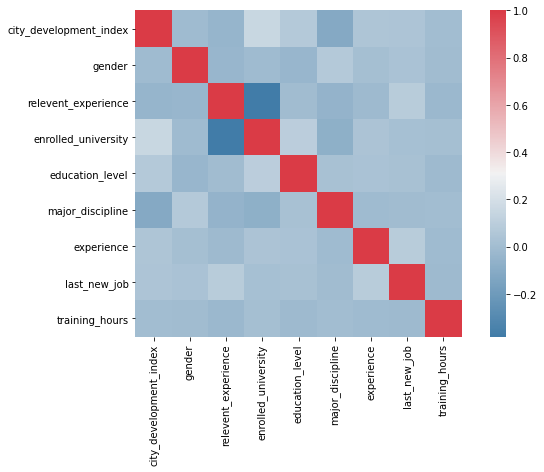

In [24]:
f, ax = plt.subplots(figsize=(10, 6))
corr = train_x.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

In [25]:
train_y=train.target

In [26]:
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=42)

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [28]:
scaler.fit(X_train)

MinMaxScaler()

In [29]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [31]:
model = models.Sequential()

model.add(layers.Dense(9, activation='relu'))
model.add(layers.Dense(3, activation='relu'))
model.add(layers.Dense(3, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy')
#              , # Target 0 또는 1로 예측
#              metrics=['accuracy'])

In [32]:
history = model.fit(X_train, y_train,validation_data=(X_test,y_test),epochs=10, batch_size=64,verbose=0)

In [33]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 9)                 90        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 30        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 12        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 4         
Total params: 136
Trainable params: 136
Non-trainable params: 0
_________________________________________________________________
None


<AxesSubplot:>

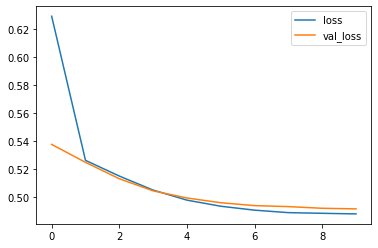

In [34]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

생성된 모델을 test data에 넣어서 예상값 확인하기

In [35]:
testt=pd.DataFrame(test, columns=['city_development_index', 'gender',
                                  'relevent_experience', 'enrolled_university', 'education_level',
                                  'major_discipline', 'experience','last_new_job', 'training_hours'])

In [36]:
testt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1386 entries, 0 to 2128
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  1386 non-null   float64
 1   gender                  1386 non-null   object 
 2   relevent_experience     1386 non-null   object 
 3   enrolled_university     1386 non-null   object 
 4   education_level         1386 non-null   object 
 5   major_discipline        1386 non-null   object 
 6   experience              1386 non-null   object 
 7   last_new_job            1386 non-null   object 
 8   training_hours          1386 non-null   int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 108.3+ KB


In [37]:
# object로 들어온 데이터를 정수형으로 바꿔줌 
le = LabelEncoder()
for x in testt:
    if testt[x].dtypes=='object':
        testt[x] = le.fit_transform(testt[x])

In [38]:
testt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1386 entries, 0 to 2128
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  1386 non-null   float64
 1   gender                  1386 non-null   int64  
 2   relevent_experience     1386 non-null   int64  
 3   enrolled_university     1386 non-null   int64  
 4   education_level         1386 non-null   int64  
 5   major_discipline        1386 non-null   int64  
 6   experience              1386 non-null   int64  
 7   last_new_job            1386 non-null   int64  
 8   training_hours          1386 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 108.3 KB


In [39]:
test['pred'] = model.predict_classes(testt)
test.pred.describe()

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


count    1386.000000
mean        0.013709
std         0.116320
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: pred, dtype: float64

In [40]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1386 entries, 0 to 2128
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             1386 non-null   int64  
 1   city                    1386 non-null   object 
 2   city_development_index  1386 non-null   float64
 3   gender                  1386 non-null   object 
 4   relevent_experience     1386 non-null   object 
 5   enrolled_university     1386 non-null   object 
 6   education_level         1386 non-null   object 
 7   major_discipline        1386 non-null   object 
 8   experience              1386 non-null   object 
 9   last_new_job            1386 non-null   object 
 10  training_hours          1386 non-null   int64  
 11  pred                    1386 non-null   int32  
dtypes: float64(1), int32(1), int64(2), object(8)
memory usage: 135.4+ KB


pred가 1로 나타난 행 확인

In [41]:
test[test.pred==1]

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,last_new_job,training_hours,pred
8,12994,city_173,0.878,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,4,2,1
104,20453,city_27,0.848,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,never,4,1
151,27117,city_90,0.698,Male,No relevent experience,Full time course,Graduate,STEM,<1,never,8,1
188,28619,city_103,0.920,Male,No relevent experience,no_enrollment,Graduate,No Major,3,never,4,1
657,23488,city_16,0.910,Male,No relevent experience,no_enrollment,Graduate,STEM,17,>4,4,1
711,17504,city_160,0.920,Other,No relevent experience,no_enrollment,Graduate,STEM,<1,never,3,1
776,22641,city_16,0.910,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,never,4,1
929,13047,city_159,0.843,Male,Has relevent experience,no_enrollment,Graduate,STEM,12,4,4,1
1059,19260,city_16,0.910,Male,Has relevent experience,no_enrollment,Graduate,STEM,12,4,2,1
1134,10198,city_105,0.794,Male,Has relevent experience,Full time course,Graduate,STEM,11,>4,3,1


In [42]:
predictions = model.predict_classes(X_test)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [43]:
predictions

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int32)

아래 값들로 모델이 변수간의 관계를 적절히 나타내지 못하는 것을 확인하였다.
2가지 category로 나누기 위해서는 다른 적절한 방법이 필요할 것으로 생각됨

In [44]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, r2_score

In [45]:
mean_squared_error(y_test,predictions)

0.22916666666666666

In [46]:
np.sqrt(mean_squared_error(y_test,predictions))

0.47871355387816905

In [47]:
explained_variance_score(y_test,predictions)

-0.10039397011720896

In [48]:
r2_score(y_test,predictions)

-0.2521724487540651